In [1]:
__author__ = "@Tssp"
__date__   = "30/12/20"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelsize']=18
plt.rcParams['axes.titlesize']=18
aur = (1 + np.sqrt(5)) / 2
aursize = (4.3*aur, 4.3)

In [2]:
delta = np.loadtxt('Simulations/delta_asc.dat', dtype=str)[:,0]
asc = np.loadtxt('Simulations/delta_asc.dat')[:,1]
delta = delta.tolist()
asc = asc.tolist()

In [3]:
# Parameters and Constants:
mass  = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky    = 2*np.pi/lambd
Iy    = 4993 * (1e4 / Eh * to * ao**2)
Vy    = alpha * Iy # a.u
Iy    = Vy/alpha
wy    = np.sqrt( 2 * Vy * ky**2 / mass)       
dho   = np.sqrt(2 / (mass * wy))
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [4]:
np.sqrt(6042/4993)

1.1000427863426487

In [5]:
print(os.getcwd())
folder_path = "Simulations/ix6042_iy4993_iz4993/config/"

/Users/tomy/PhD/Ultracold_Atoms_src/Analysis/q3d


In [6]:
Data = list()
delta_nonreaded = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_x10000_y10000_z10000_120rm8g2l60m14_68CM8g1L60M14_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix6042_iy4993_iz4993_LiLi_a3Sup_0{d}_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_int_rm250_CM50_ddb.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a few folders without data, \ndelta={delta_nonreaded} non readed')

There are a few folders without data, 
delta=['.707666', '.707891', '.7081066', '.7083468', '.708483', '.708822', '.7090032', '.7090948', '.7092404', '.7091583', '.70965', '.70970', '.70975', '.70980', '.70985', '.70990', '.70995', '.71000', '.71005', '.71120', '.71350', '.71385', '.71395', '.72900', '.73000', '.73100', '.73200', '.73300', '.73400', '.73500', '.73600', '.73700', '.73800'] non readed


In [7]:
# Delete from original delta and asc lists the unreaded values:
for dnr in delta_nonreaded:
    idx = delta.index(dnr)
    del delta[idx], asc[idx]
assert len(delta) == len(asc)
print("filtering completed")
x = dho / asc

filtering completed


In [8]:
dic = transpose_energies(Data)

In [9]:
least_bound_pos = 1000

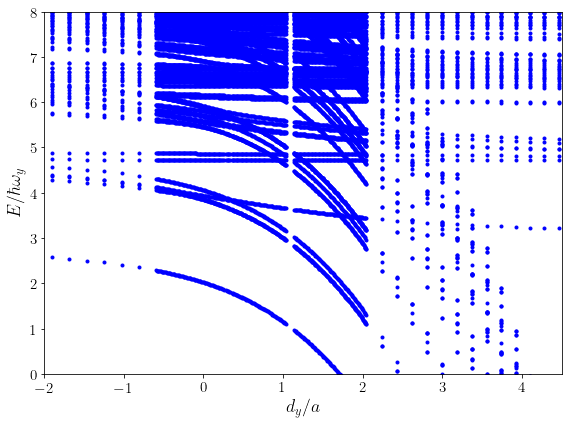

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 100):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'b.')
#ax.plot(x, dic['nivel_1004']/wy, 'r')
ax.set_ylim(0, 8)
ax.set_xlim(-2, 4.5)
ax.set_xlabel('$d_{y}/a$')
ax.set_ylabel('$E/\hbar \omega_{y}$')
plt.tight_layout()
fig.savefig('Results/Figures/Ix6042_Iy4993_Iz4993_Easc.png', dpi=200)
plt.show()

# Crosses

In [11]:
%matplotlib inline

## Resonance x=0

1001
1002
1003


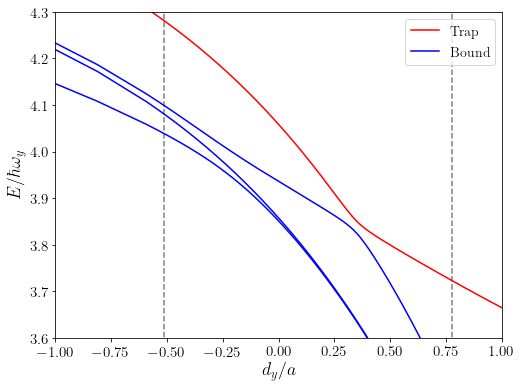

In [12]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
ax2.plot(x, dic['nivel_1004']/wy, 'r', label='trap')
for i in range(least_bound_pos+1, least_bound_pos + 4):
    print(i)
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b', label='Data')
ax2.vlines(x[-19], 3.5, 4.3, alpha=0.5, linestyles='--')
ax2.vlines(x[-140], 3.5, 4.3, alpha=0.5, linestyles='--')
ax2.set_ylim(3.6, 4.3)
ax2.set_xlim(-1, 1)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Trap', 'Bound'], fontsize=14)
#plt.savefig('Results/Figures/Ix5505_Iy4993_Iz4993_Easc_Zoom.png', dpi=200)
plt.show()

In [13]:
print(f'''To find the eigenstates:
x={x[-19]}, delta=0{delta[-19]}
x={x[-140]}, delta=0{delta[-140]}''')

To find the eigenstates:
x=-0.5116376524089361, delta=0.71760
x=0.7763496372772335, delta=0.71140


## Resonance x>1

1005
1006
1007
1008
1009
1010


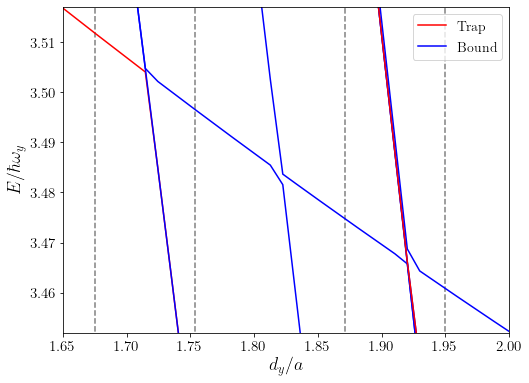

In [27]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
ax2.plot(x, dic['nivel_1004']/wy, 'r')
for i in range(least_bound_pos+5, least_bound_pos + 11):
    print(i)
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.plot(x, dic['nivel_1009']/wy, 'r')
#ax2.plot(x, dic['nivel_1006']/wy, 'b')
#ax2.plot(x, dic['nivel_1007']/wy, 'b')
#ax2.plot(x, dic['nivel_1010']/wy, 'b')
ax2.vlines(x[53], 3.4, 3.52, alpha=0.5, linestyles='--')
ax2.vlines(x[45], 3.4, 3.52, alpha=0.5, linestyles='--')
ax2.vlines(x[33], 3.4, 3.52, alpha=0.5, linestyles='--')
ax2.vlines(x[25], 3.4, 3.52, alpha=0.5, linestyles='--')
ax2.set_ylim(3.452, 3.517)
ax2.set_xlim(1.65, 2)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Trap', 'Bound'], fontsize=14)
#plt.savefig('Results/Figures/Ix6042_Iy4993_Iz4993_Easc_Zoom.png', dpi=200)
plt.show()

In [15]:
print(f'''To find the eigenstates:
x={x[53]}, delta=0{delta[53]}
x={x[45]}, delta=0{delta[45]}
x={x[33]}, delta=0{delta[33]}
x={x[25]}, delta=0{delta[25]}''')

To find the eigenstates:
x=1.6754095166919567, delta=0.70690
x=1.7539471160533657, delta=0.70650
x=1.8713425133418307, delta=0.70590
x=1.9493339400101208, delta=0.70550


In [18]:
%matplotlib

Using matplotlib backend: MacOSX


In [19]:
fig2, ax2 = plt.subplots(figsize=aursize)
for i in range(least_bound_pos+4, least_bound_pos + 11):
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.set_ylim(3.452, 3.517)
ax2.set_xlim(1.65, 2)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
plt.grid()
xcoord = []
ycoord = []
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    plt.plot(ix, iy, 'ro', markersize=4)
    plt.draw()
    global xcoord, ycoord
    xcoord.append(ix)
    ycoord.append(iy)
    if len(xcoord) == 30:
        fig2.canvas.mpl_disconnect(cid)
        print(f'xcoord: {xcoord}\n ycoord: {ycoord}')
    return xcoord, ycoord
cid = fig2.canvas.mpl_connect('button_press_event', onclick)
plt.show()

xcoord: [1.6507840501792115, 1.6531362007168457, 1.6550179211469533, 1.6578405017921147, 1.6609767025089606, 1.6642697132616486, 1.6678763440860216, 1.6719534050179212, 1.6760304659498209, 1.6802643369175627, 1.7271505376344085, 1.7318548387096775, 1.7384408602150538, 1.74706541218638, 1.7553763440860215, 1.7669802867383513, 1.7795250896057349, 1.7926971326164876, 1.8050851254480287, 1.8372311827956989, 1.8508736559139785, 1.8620071684587813, 1.8786290322580645, 1.8982302867383511, 1.9429211469534051, 1.9517025089605735, 1.960483870967742, 1.970676523297491, 1.9822804659498208, 1.9929435483870968]
 ycoord: [3.5166589679147324, 3.516062757975454, 3.5155261690301036, 3.515049201078681, 3.5145722331272586, 3.5139164021940523, 3.513260571260846, 3.512306635358001, 3.5117700464126504, 3.510816110509805, 3.501753719432775, 3.500680541542074, 3.4996073636513727, 3.4980572178092495, 3.496089725009631, 3.4940626112160844, 3.4916777714589715, 3.489114068720075, 3.486908091944745, 3.4810056135458

In [20]:
%matplotlib inline

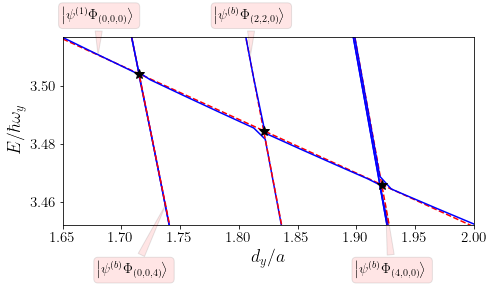

In [54]:
fig3, ax3 = plt.subplots(figsize=aursize)
# nivel 1004:
f1004 = np.polyfit(xcoord, ycoord, deg=1)
x1004 = np.linspace(1.65, 2, num=40)
ax3.plot(x1004, np.polyval(f1004, x1004), 'r--', markersize=4, label='Diabetic')
ax3.plot(x, dic['nivel_1004']/wy, 'b', label='Adiabatic')

# nivel 1005:
ax3.plot(x, dic['nivel_1005']/wy, 'b')

# nivel 1006:
f1006 = np.polyfit(x[(x < 1.72) & (x > 1.7)], np.array(dic['nivel_1006'])[(x < 1.72) & (x > 1.7)]/wy, deg=1)
x1006 = np.linspace(1.7, 1.77, num=500)
ax3.plot(x1006, np.polyval(f1006, x1006), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1006']/wy, 'b')


# nivel 1007:
f1007 = np.polyfit(x[(x < 1.82) & (x > 1.80)], np.array(dic['nivel_1007'])[(x < 1.82) & (x > 1.80)]/wy, deg=1)
x1007 = np.linspace(1.8, 1.86, num=500)
ax3.plot(x1007, np.polyval(f1007, x1007), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1007']/wy, 'b')


# nivel 1008:
ax3.plot(x, dic['nivel_1008']/wy, 'b')
#f1008 = np.polyfit(x[(x < 1.84) & (x > 1.82)], np.array(dic['nivel_1008'])[(x < 1.84) & (x > 1.82)]/wy, deg=1)
#x1008 = np.linspace(1.8, 1.86, num=500)
#ax3.plot(x1008, np.polyval(f1008, x1008), 'r--', markersize=4)

# nivel 1009:
ax3.plot(x, dic['nivel_1009']/wy, 'b')

# nivel 1010:
f1010 = np.polyfit(x[(x < 1.91) & (x > 1.86)], np.array(dic['nivel_1010'])[(x < 1.91) & (x > 1.86)]/wy, deg=1)
x1010 = np.linspace(1.87, 1.94, num=500)
ax3.plot(x1010, np.polyval(f1010, x1010), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1010']/wy, 'b')

# Crosses:
##########
ax3.plot(cross_points(f1004, f1006), np.polyval(f1004, cross_points(f1004, f1006)), 'k*', markersize=10, label='ICIR')
ax3.plot(cross_points(f1004, f1007), np.polyval(f1004, cross_points(f1004, f1007)), 'k*', markersize=10)
ax3.plot(cross_points(f1004, f1010), np.polyval(f1004, cross_points(f1004, f1010)), 'k*', markersize=10)

# States:
#########
ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(1.68, 3.51), xytext=(1.65, 3.523), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,0,4)}\right>$', xy=(1.739, 3.46), xytext=(1.68, 3.435), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(4,0,0)}\right>$', xy=(1.925, 3.46), xytext=(1.90, 3.435), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,4,0)}\right>$', xy=(1.78, 3.368), xytext=(1.75, 3.39), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,2)}\right>$', xy=(1.843, 3.38), xytext=(1.80, 3.39), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,2)}\right>$', xy=(1.843, 3.38), xytext=(1.85, 3.39), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,2,0)}\right>$', xy=(1.81, 3.51), xytext=(1.78, 3.523), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))


ax3.set_xlabel('$d_{y}/a$')
ax3.set_ylabel('$E/\hbar \omega_{y}$')
#ax3.legend(fontsize=14, bbox_to_anchor=(1.03, 1))
ax3.set_ylim(3.452, 3.517)
ax3.set_xlim(1.65, 2)
plt.tight_layout()
fig3.savefig('Results/Figures/Ix6042_Iy4993_Iz4993_Easc_Interpolation_v2.png', bbox_inches="tight", dpi=200)

In [56]:
print(f'''Crosses between (x, E):
* 1004-1006: ({cross_points(f1004, f1006)}, {np.polyval(f1004, cross_points(f1004, f1006))})
* 1004-1008: ({cross_points(f1004, f1007)}, {np.polyval(f1004, cross_points(f1004, f1007))})
* 1004-1010: ({cross_points(f1004, f1010)}, {np.polyval(f1004, cross_points(f1004, f1010))})''')

Crosses between (x, E):
* 1004-1006: (1.7149691681694315, 3.504186541015058)
* 1004-1008: (1.8211709933617295, 3.4844923540422537)
* 1004-1010: (1.921803122079897, 3.465831017903648)


In [57]:
print(f"ICIR: asc/dy = {1/cross_points(f1004, f1006)}\nasc = {1/cross_points(f1004, f1006) * dho}")

ICIR: asc/dy = 0.5831008618466337
asc = 1013.2374407315187


In [58]:
np.savetxt('Results/ICIR_positions_6042_4993_4993.txt', 
           [[1.1, 1.1, 1.1], [1/cross_points(f1004, f1006), 1/cross_points(f1004, f1007), 1/cross_points(f1004, f1010)], 
            [np.polyval(f1004, cross_points(f1004, f1006)), np.polyval(f1004, cross_points(f1004, f1007)), np.polyval(f1004, cross_points(f1004, f1010))]], 
           header='wx/wy, asc/dy, E/hwy', )